In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import DateOffset

In [2]:

sns.set(style="whitegrid")
data = pd.read_csv('Dispensaries.csv')

data['Expire Date'] = pd.to_datetime(data['Expire Date'], format='%m/%d/%y', errors='coerce')
data['Effective Date'] = pd.to_datetime(data['Effective Date'], format='%m/%d/%y', errors='coerce')

standard_license_duration = pd.DateOffset(years=1)
data['estimated_effective_date'] = data.apply(
    lambda row: row['Expire Date'] - standard_license_duration if pd.isnull(row['Effective Date']) else row['Effective Date'], 
    axis=1
)
data.dropna(subset=['estimated_effective_date'], inplace=True)
data['year'] = data['estimated_effective_date'].dt.year.astype(int)
license_count_per_year = data.groupby('year').size()
print(license_count_per_year)

year
2016    157
2017    338
2018    142
2019    118
2020    132
2021    243
2022    419
2023    639
dtype: int64


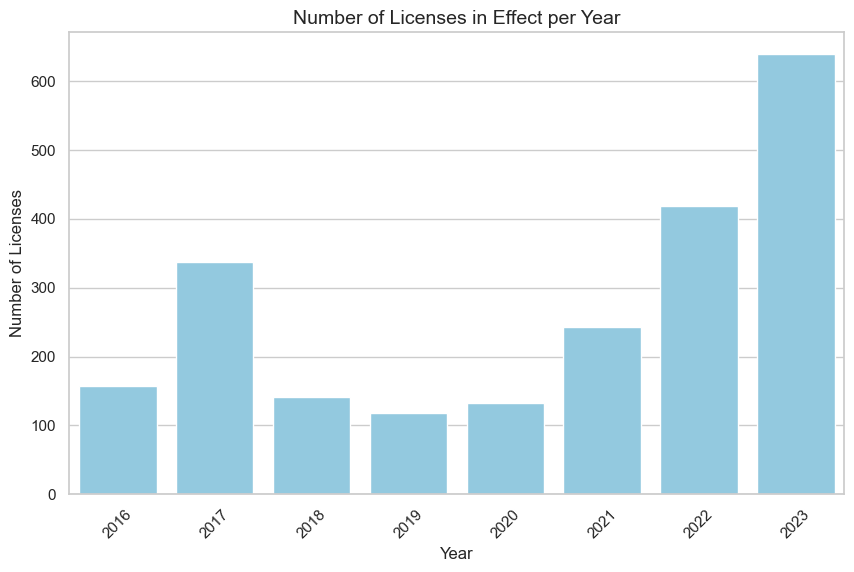

In [3]:
plt.style.use('bmh')
plt.figure(figsize=(10, 6))
sns.barplot(x=license_count_per_year.index.astype(str), y=license_count_per_year.values, color='navy')
plt.title('Number of Licenses in Effect per Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Licenses', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('license_count_per_year_academic.png', dpi=300)
plt.show()